# Задание 1
Есть мнение: раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов movies_stats.csv. То есть проверить, верно ли, что с ростом года выпуска фильма средний рейтинг становится ниже.

При этом мы не будем затрагивать субъективные факторы этих рейтингов, а пройдёмся по следующему алгоритму:
1. В переменную years запишите список из всех годов с 1950-го по 2010-й.
2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска (год выпуска берём из столбца title). Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
  - для каждой строки пройдите по всем годам списка years;
  - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска;
  - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.
4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movies_stats.csv')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [3]:
def production_year(name):
    for year in years:
        if str(year) in name:
            return year
    return 1900

In [4]:
years = list(range(1950, 2011))
df['year'] = df['title'].apply(production_year)

In [10]:
ratings = pd.DataFrame(df.groupby('year').rating.mean().sort_values(ascending=False)).reset_index()

In [11]:
ratings

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539
...,...,...
57,2005,3.448434
58,2003,3.444777
59,1996,3.426600
60,1997,3.415764


Text(0, 0.5, 'Средний рейтинг')

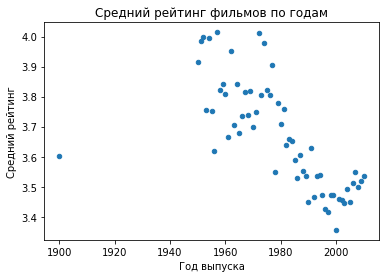

In [18]:
ratings.plot.scatter(x='year', y='rating')
plt.title('Средний рейтинг фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')

Таким образом, утверждение "раньше снимали настоящее кино, не то что сейчас" можно считать верным, так как рейтинг более ранних фильмов значительно выше рейтинга современного кино.